First we import the necessary packages and ensure we are pointed in the correct workspace

In [ ]:
#Import necessary packages and define working directory
import os
cd= #Your current directory. For example: 'C:\\Users\\hello\\OneDrive\\Documents\\ArcGIS\\Projects\\template'
PATH = cd
PATH


# Import system modules
import arcpy as ap
from arcpy import env
from arcpy.sa import * # By explicitly importing all of the spatial analyst extensions tools we don't need to prepend the module name.
import pandas as pd
import numpy as np
import random #unsure what this is for, but doing so makes it work

# Set environment settings
env.workspace = PATH
env.workspace
env.overwriteOutput = True # We need to set this explicitly so that we can easily rerun the code if we change the parameters 
GDB = ap.ListWorkspaces("*", "FileGDB")[0] # returns the geodatabase names and the full address.
GDB # Make sure it is pointing to the right location

Next, we use the list of arrays of coordinates created in the excel spreadsheet to create the polygon layer. This code works by considering each array of coordinates at once, creating a point for each coordinate pair in the array at hand, and then creating a polygon with the created points. When creating the list of coordinate pairs, the first pair is repeated at the end so that the polygon is closed. 

In [ ]:
# Set workspace
env.workspace = PATH

# Set coordinate sets
#Below is an example list of a list of coordinates. Note the format
#coord_sets = [ [(-98.000,16.000), (-96.000,16.000),(-96.000,15.000),(-98.000,15.000),(-98.000,16.000)],[(-98.000,16.000), (-96.000,16.000),(-96.000,15.000),(-98.000,15.000),(-98.000,16.000)]]
coord_sets = [] #Copy the text from the third sheet, making sure to delete the comma after the last entry.

# Create an empty polygon feature class
arcpy.CreateFeatureclass_management(PATH, "polygons.shp", "POLYGON")
#if there is an error related to the coordinate system, make sure to define the coordinate system of the map as WGS 1984 (Not WGS 1984 Web Mercator)


# Use an insert cursor to add polygons to the feature class
with arcpy.da.InsertCursor("polygons.shp", ["SHAPE@"]) as cursor:
    for coord_set in coord_sets:
        # Create an array object to store the polygon coordinates
        array = arcpy.Array()


        # Iterate through the coordinates and add them to the array
        for coord in coord_set:
            point = arcpy.Point(coord[0], coord[1])
            array.append(point)
            

        # Create a polygon object
        polygon = arcpy.Polygon(array)

        # Insert the polygon into the feature class
        cursor.insertRow([polygon])


Following the running of the above code, we must join the OIM spreadsheet with the polygons.

The first step to this is importing the data from the spreadsheet to the current map. To do this, from the map tab, select "Add Data" and naviate to the csv downloaded.

Since the polygons were created in the same order they appear in the OIM spreadsheet, we know the "Number" column matches the FID field in the polygon. 

To do this, select "Add Join" after right clicking on the "polygons" feature in the contents tab and fill out the information as is done below: 
<img src=attachment:AddJoin.JPG alt="AddJoin" width="50%"/>


Now, we are done using ArcGIS Pro and must export the file to GeoJSON using the "features to JSON" tool and the parameters as shown below:

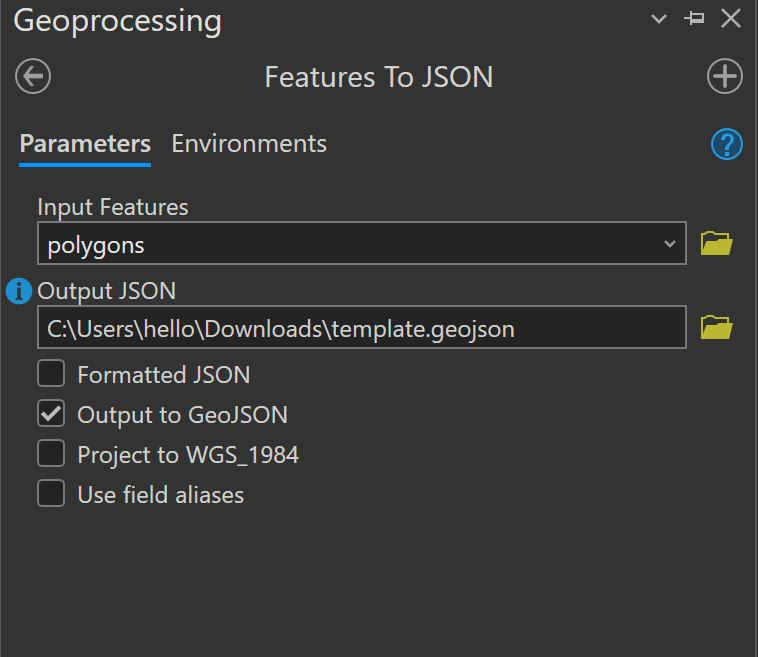

If this process fails (when running sometimes there is an uncaught error that it produces), you can uncheck the "Export to GeoJSON" box and then convert the JSON file to GeoJSON using QGIS. 






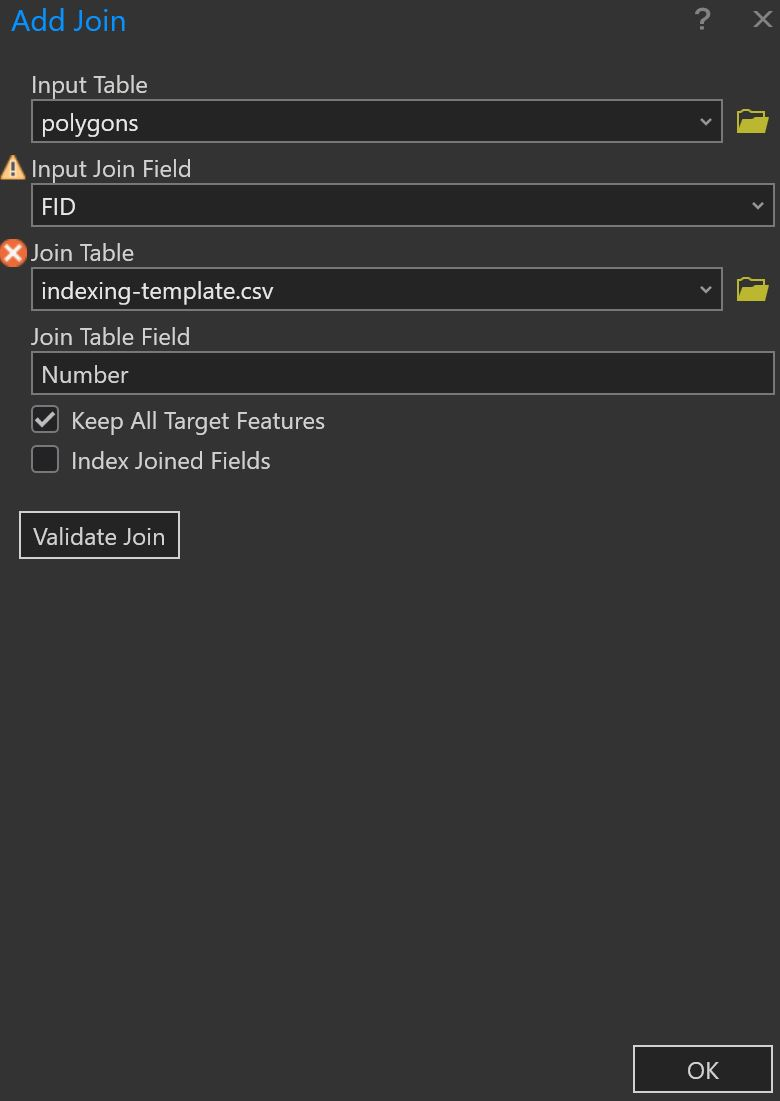